# 인공지능개론 202334716 이예나

## wine 데이터셋 분석 (머신러닝, 딥러닝)

---

# 데이터 전처리

## 라이브러리 import

In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

## 로컬에서 데이터 불러오기(csv)

In [3]:
df = pd.read_csv("/Users/yenalee/Desktop/workplace/AI_2025-1/week4/wine.csv") # 로컬(MAC)
df

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


### 와인 데이터셋 컬럼 설명

- **Alcohol (알코올)**: 와인의 알코올 도수 (%)  
- **Malic Acid (사과산)**: 와인의 신맛을 결정하는 주요 유기산  
- **Ash (회분)**: 와인 속 무기질 성분의 총량  
- **Acl (알칼리도)**: 와인의 알칼리 함량 (주로 탄산칼륨 기준)  
- **Mg (마그네슘)**: 와인의 미네랄 함량 (마그네슘 농도)  

- **Phenols (총 폴리페놀)**: 와인의 전체적인 폴리페놀 함량 (항산화 효과에 영향)  
- **Flavanoids (플라보노이드)**: 와인의 쓴맛과 색상에 영향을 주는 주요 폴리페놀 성분  
- **Nonflavanoid Phenols (비플라보노이드 폴리페놀)**: 와인의 구조와 색상에 영향을 주는 비플라보노이드 계열 성분  
- **Proanth (프로안토시아니딘)**: 와인의 타닌 성분과 관련된 항산화 물질  

- **Color Intensity (색상 강도)**: 와인의 색상 농도를 나타내는 지표  
- **Hue (색조)**: 와인의 색깔 (적색 vs 황색 계열)  
- **OD (광학 밀도)**: 와인의 빛 투과율과 관련된 값

- **Proline (프롤린)**: 와인의 아미노산 함량 (숙성과 풍미에 영향)  


## 상관관계 행렬 확인

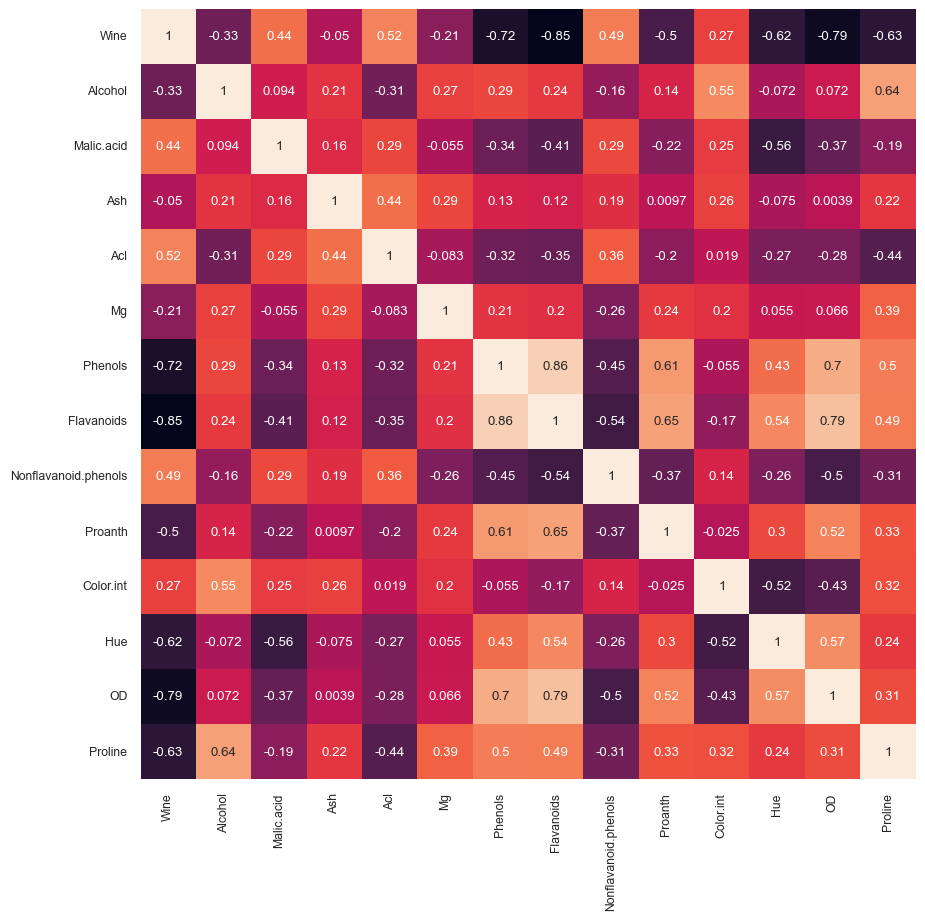

In [5]:
# 0.3 이상인 경우 상관관계가 있고, 0.7이상이면 아주 높음

df_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

## 결측치 확인

In [7]:
df.isnull().sum()

Wine                    0
Alcohol                 0
Malic.acid              0
Ash                     0
Acl                     0
Mg                      0
Phenols                 0
Flavanoids              0
Nonflavanoid.phenols    0
Proanth                 0
Color.int               0
Hue                     0
OD                      0
Proline                 0
dtype: int64

## Wine column의 value counts 확인

In [9]:
df['Wine'].value_counts()

Wine
2    71
1    59
3    48
Name: count, dtype: int64

## label 분리

In [11]:
x = df.drop('Wine', axis=1)
y = df['Wine']

In [13]:
print(x)
print(y)

     Alcohol  Malic.acid   Ash   Acl   Mg  Phenols  Flavanoids  \
0      14.23        1.71  2.43  15.6  127     2.80        3.06   
1      13.20        1.78  2.14  11.2  100     2.65        2.76   
2      13.16        2.36  2.67  18.6  101     2.80        3.24   
3      14.37        1.95  2.50  16.8  113     3.85        3.49   
4      13.24        2.59  2.87  21.0  118     2.80        2.69   
..       ...         ...   ...   ...  ...      ...         ...   
173    13.71        5.65  2.45  20.5   95     1.68        0.61   
174    13.40        3.91  2.48  23.0  102     1.80        0.75   
175    13.27        4.28  2.26  20.0  120     1.59        0.69   
176    13.17        2.59  2.37  20.0  120     1.65        0.68   
177    14.13        4.10  2.74  24.5   96     2.05        0.76   

     Nonflavanoid.phenols  Proanth  Color.int   Hue    OD  Proline  
0                    0.28     2.29       5.64  1.04  3.92     1065  
1                    0.26     1.28       4.38  1.05  3.40     1050  


## 정규화 및 train, test 데이터 분리

In [15]:
# 정규화
scaler = StandardScaler()
x = scaler.fit_transform(x)

# 트레인 / 테스트 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

## shape 확인
train과 test data의 비율 - 142 : 36

훈련 데이터 142개의 샘플, 13개의 특성

테스트 데이터 142개의 샘플, 13개의 특성

In [17]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((142, 13), (36, 13), (142,), (36,))

---

# 머신러닝 - 분류(4가지 모델)

## 머신러닝(분류)를 위한 라이브러리 import

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

## SVM(SVC) 모델 생성

In [21]:
from sklearn.svm import SVC

clf_svm = SVC(random_state=0)
clf_svm.fit(x_train, y_train) # 모델 학습

pred_svm = clf_svm.predict(x_test) # 테스트 데이터 예측

print("\n--- SVM Classifier ---")
print("accuracy : ", accuracy_score(y_test, pred_svm)) # 정확도 출력
print(confusion_matrix(y_test, pred_svm)) # 혼동행렬 출력


--- SVM Classifier ---
accuracy :  1.0
[[14  0  0]
 [ 0 16  0]
 [ 0  0  6]]


## 혼동 행렬(Confusion Matrix) 시각화

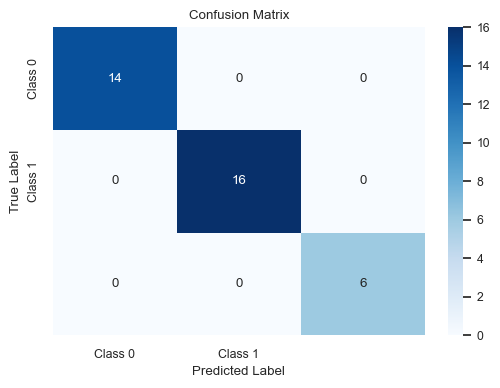

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# 예측값 계산 (이미 예측된 값 사용)
y_pred = pred_svm

# 혼동 행렬 계산
cm = confusion_matrix(y_test, y_pred)

# 시각화
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

## 로지스틱 회귀(LR) 모델 생성

In [25]:
clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(x_train, y_train)

pred_lr = clf_lr.predict(x_test)

print ("\n--- Logistic Regression Classifier ---")
print ("accuracy : ", accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
accuracy :  1.0
[[14  0  0]
 [ 0 16  0]
 [ 0  0  6]]


## 의사결정나무(Decision Tree) 모델 생성

In [27]:
clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(x_train, y_train)

pred_dt = clf_dt.predict(x_test)

print ("\n--- Decision Tree Classifier ---")
print ("accuracy : ", accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
accuracy :  0.9722222222222222
[[14  0  0]
 [ 1 15  0]
 [ 0  0  6]]


## 랜덤포레스트(RF) 모델 생성

In [29]:
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(x_train, y_train)
pred = rf_clf.predict(x_test)

print ("\n--- Radom Forest ---")
print("accuracy : ", accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))


--- Radom Forest ---
accuracy :  0.9722222222222222
[[14  0  0]
 [ 0 15  1]
 [ 0  0  6]]


---

# 딥러닝

## 라이브러리 불러오기

In [29]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

## 원-핫 인코딩(One-Hot Encoding)
: **범주형 데이터**를 숫자로 변환하는 방법

클래스 간의 순서를 없애서 모델이 불필요한 관계를 학습하는 것을 방지

In [31]:
y

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Wine, Length: 178, dtype: int64

In [33]:
Y = pd.get_dummies(y, dtype=int).values

## 딥러닝을 위한 numpy 변환

In [101]:
x

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [103]:
Y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1,

## 데이터 분리

In [105]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, Y, test_size=0.2, random_state=0) 

## shape 확인

In [107]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((142, 13), (36, 13), (142, 3), (36, 3))

## 모델 생성

In [119]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam

# 모델 생성
model = Sequential()

# 레이어 추가
model.add(Dense(10,input_shape=(13,),activation='relu')) # 입력 피쳐의 개수
model.add(Dense(8,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(3,activation='softmax')) # 다중분류, 이진분류 구분

model.compile(Adam(learning_rate=0.04),'categorical_crossentropy',metrics=['accuracy'])

model.summary()

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 10)             │           140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 8)              │            88 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 6)              │            54 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 3)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 303 (1.18 KB)

 Trainable params: 303 (1.18 KB)

 Non-trainable params: 0 (0.00 B)

**Dense**()를 사용해 레이어를 추가, 각각의 레이어가 신경망 역할

1. 첫 번째 레이어 (입력층)
    ```python
    model.add(Dense(10, input_shape=(30,), activation='relu'))
    ```

    특징 개수 30개 / 노드(뉴런) 10개 / ReLU(Rectified Linear Unit) 활성화 함수 사용


2. 두 번째, 세 번째 레이어 (은닉층)
    ```python
    model.add(Dense(8,activation='relu'))
    model.add(Dense(6,activation='relu'))
    ```

    8개, 6개 노드를 가진 은닉층 추가 / 각 층에 비선형 변환 적용

   -> 은닉층이 많아질수록 모델이 더 복잡한 패턴을 학습할 수 있지만, 너무 많으면 과적합(overfitting)이 발생할 수 있다.


3. 마지막 레이어 (출력층)
   ```python
    model.add(Dense(2, activation='softmax'))
    ```

   노드 개수 2개 / 출력값을 확률값(0~1)으로 변환해서, 각 클래스에 대한 확률을 나타냄

    - softmax를 사용하는 이유
      : 두 개 이상의 클래스를 분류하는 다중분류 문제에서 사용
    

4. 모델 컴파일
    ```python
    model.compile(Adam(learning_rate=0.04),'binary_crossentropy',metrics=['accuracy'])
    ```

    Adam 최적화 알고리즘 사용, 학습률 0.04 설정, 다중 분류 손실 함수, 성능 평가(정확도)

   - 손실 함수
     
     클래스 2개(이진분류) - binary_crossentropy
     
     클래스 3개 이상 - categorical_crossentropy


5. 모델 요약
    ```python
    model.summary()
    ```

    신경망 모델의 구조, 파라미터 개수 출력

    Param # : 각 레이어에서 학습해야 할 가중치 개수

    Output Shape : 해당 레이어를 통과한 후 데이터의 형태

## 모델 학습 및 예측

In [124]:
model_history=model.fit(x=x_train, y=y_train, epochs=30, batch_size=32, validation_split=0.1)

y_pred = model.predict(x_test) # 예측

y_test_class = np.argmax(y_test,axis=1) # 실제 값
y_pred_class = np.argmax(y_pred,axis=1) # 예측 값

Epoch 1/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 1.0000 - loss: 1.8129e-05 - val_accuracy: 1.0000 - val_loss: 2.2314e-05
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 2.0974e-05 - val_accuracy: 1.0000 - val_loss: 2.2306e-05
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 2.0657e-05 - val_accuracy: 1.0000 - val_loss: 2.2259e-05
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 2.5836e-05 - val_accuracy: 1.0000 - val_loss: 2.2211e-05
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 1.8122e-05 - val_accuracy: 1.0000 - val_loss: 2.2163e-05
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 2.7840e-05 - val_accuracy: 1.0000 - val_loss: 2.2100e-05
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 1.9072e-05 - val_accuracy: 1.0000 - val_loss: 2.2028e-05
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 

#### accuracy: x.xxx
- 훈련 데이터에 대한 정확도
- 예: `accuracy: 0.3201`은 32.01%의 정확도를 의미

#### loss: x.xxx
- 손실 값, 모델이 훈련 데이터에서 얼마나 잘못 예측했는지 나타낸다.
- 값이 작을수록 모델이 잘 학습됨을 의미

#### val_accuracy: x.xxx
- 검증 데이터에 대한 정확도
- 예: `val_accuracy: 0.5333`은 검증 데이터에 대해 53.33%의 정확도를 의미

#### val_loss: x.xxx
- 검증 데이터에 대한 손실 값
- 검증 데이터에서 모델의 예측이 얼마나 부정확했는지 나타낸다.

## 훈련 손실(Training loss), 검증 손실(Validation loss) 비교 그래프

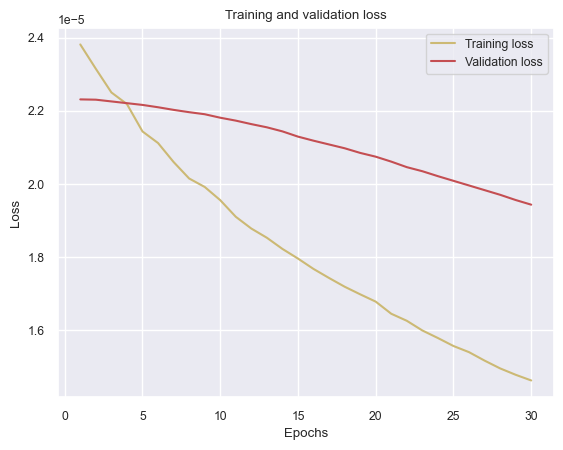

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns

loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## 훈련 정확도(Training Accuracy), 검증 정확도(Validation Accuracy) 비교 그래프

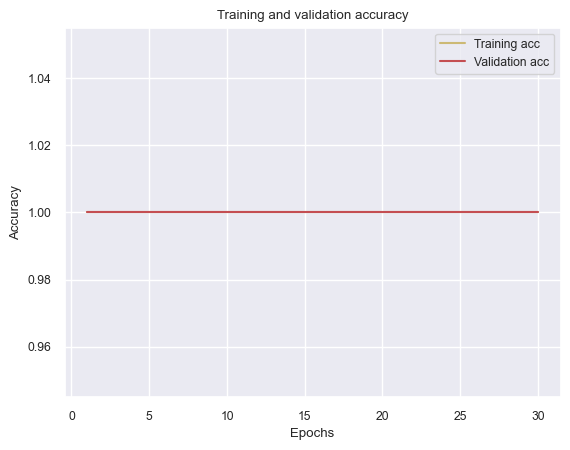

In [140]:
acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label = 'Training acc')
plt.plot(epochs, val_acc, 'r', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## 정확도 및 성능 평가

In [144]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class)) # 혼동행렬

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00         6

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

[[14  0  0]
 [ 0 16  0]
 [ 0  0  6]]


Precision (정밀도) : 모델이 긍정적 클래스라고 예측한 것들 중 실제로 긍정적인 것의 비율 (정확히 맞춘 비율)

Recall (재현율) : 실제 긍정적인 것들 중 모델이 긍정적이라고 예측한 것의 비율

F1-Score : Precision과 Recall의 조화 평균

Support : 각 클래스의 샘플 수

macro avg, weighted avg : 전체 성능을 종합한 값